In [58]:
# Initialization for this notebook.

import numpy as np
import matplotlib.pyplot as plt

# Un-comment the following line to use interactive matplotlib widget.
#%matplotlib widget

# Returns a n seqence based on the offset provided.
seq_n = lambda seq, noff: np.arange(seq.size) - noff

# Pretty print a sequence.
seq_print = lambda seq, noff, name: print('noff_%s =%2d, %s =' % (name, noff, name), seq.astype(float))

# Common sequence generators.
seq_delta = lambda n_min, n_max: (np.array([ 1 if n==0 else 0 for n in range(n_min, n_max+1)]), 0 - n_min)
seq_u = lambda n_min, n_max: (np.array([ 0 if n<0 else 1 for n in range(n_min, n_max+1)]), 0-n_min)
seq_R_N = lambda N, n_min, n_max: (np.array([ 0 if (n<0 or n>=N) else 1 for n in range(n_min, n_max+1)]), 0-n_min)
seq_real_exp = lambda a, n_min, n_max: (np.array([ 0 if n<0 else a**n for n in range(n_min, n_max+1)]), 0-n_min)
seq_complex_exp = lambda sigma, omega_0, n_min, n_max: (np.array([ np.exp((sigma + 1j*omega_0)*n) for n in range(n_min, n_max+1)]), 0-n_min)
seq_sin = lambda A, omega_0, phi, n_min, n_max: (np.array([ A*np.sin(omega_0*n + phi) for n in range(n_min, n_max+1)]), 0-n_min)

# Returns a flipped sequence.
seq_flip = lambda seq, noff: (seq[::-1], seq.size - noff - 1)

# Returns a shifted sequence.
seq_shift = lambda seq, noff, m: (seq, noff - m)

# Align 2 sequences
def seq_align(seq1, noff1, seq2, noff2):
    """Align 2 sequences"""
    n_min = min(-noff1, -noff2)
    n_max = max(seq1.size-noff1-1, seq2.size-noff2-1)
    seq1 = np.pad(seq1, (-noff1-n_min, n_max-(seq1.size-noff1-1)), constant_values=(0,0))
    noff1 = -n_min
    seq2 = np.pad(seq2, (-noff2-n_min, n_max-(seq2.size-noff2-1)), constant_values=(0,0))
    noff2 = -n_min
    return (seq1, noff1, seq2, noff2)

def plotVertical(title, plotData):
    """
        Parameters:
        title: plot title string
        plotData: tuple array, contains data to plot
        [(seq, noff, label), ...]
    """
    # Get the row number
    row = len(plotData)
    # Create a plot, which plots data sequence vertically, shares the same X and Y axis
    _, axe = plt.subplots(row, 2, sharex=True, sharey=True)
    axe[0][0].set_title(title)
    for i in range(row):
        # Get the arguments
        seq, offset, label = plotData[i]
        # Create a stem plot for seq
        axe[i][0].stem(seq_n(seq, offset), seq.real)
        # Set Y label
        axe[i][0].set_ylabel(f'Re[{label}]')
        # Create a stem plot for seq.imag
        axe[i][1].stem(seq_n(seq, offset), seq.imag)
        # Set Y label
        axe[i][1].set_ylabel(f'Im[{label}]')
    # Set X label at the bottom
    axe[-1][0].set_xlabel('n')
    axe[-1][1].set_xlabel('n')

def seq_conv(seq1, noff1, seq2, noff2):
    """
    Returns the discrete, linear convolution of two sequences.

    Parameters:
        seq1, seq2: array_like
            The 2 input sequences.
        noff1, noff： int
            n's offsets of the 2 input sequences.
    Returns: (seq, noff)
        seq: array_like
            The output sequence.
        noff: int
            n's offset of the output sequence.
    """
    # Flip seq2
    seq2Flipped, noff2Flipped = seq_flip(seq2, noff2)
    # Range of the result sequence, nEnd is exclusive
    (nStart, nEnd) = (-(noff1 + noff2),
                      (seq2.size - noff2 - 1) + (seq1.size - noff1 - 1) + 1)
    # Result sequence length
    resultLen = nEnd - nStart
    resultSeq = np.empty([resultLen], dtype=seq1.dtype)
    # Foreach n to create the result sequence
    for n in range(nStart, nEnd):
        # Shift h(n), which is seq2
        seq2Shifted, noff2Shifted = seq_shift(seq2Flipped, noff2Flipped, n)
        # Align the h(n) and x(n)
        seq1Aligned, _, seq2Aligned, _ = seq_align(
            seq1, noff1, seq2Shifted, noff2Shifted)
        # Multiply two aligned sequence and sum it up
        resultSeq[n - nStart] = (seq1Aligned * seq2Aligned).sum()
    # Return the result sequence and its noff
    return resultSeq, noff1


# 习题2.9

1. $ \delta(n-n_{0}) $

## 理论计算

$$ X(e^{j\omega})=DTFT[x(n)]=\tilde{X}(e^{j\omega})==e^{-j{\omega}n_{0}} $$

## 编程验证


X:[ 1.        +0.j          0.84125353-0.54064082j  0.41541501-0.909632j
 -0.14231484-0.98982144j -0.65486073-0.75574957j -0.95949297-0.28173256j
 -0.95949297+0.28173256j -0.65486073+0.75574957j -0.14231484+0.98982144j
  0.41541501+0.909632j    0.84125353+0.54064082j]
DTFT:[ 1.        +0.j          0.84125353-0.54064082j  0.41541501-0.909632j
 -0.14231484-0.98982144j -0.65486073-0.75574957j -0.95949297-0.28173256j
 -0.95949297+0.28173256j -0.65486073+0.75574957j -0.14231484+0.98982144j
  0.41541501+0.909632j    0.84125353+0.54064082j]
DTFT[x(n)] equals X(jω)


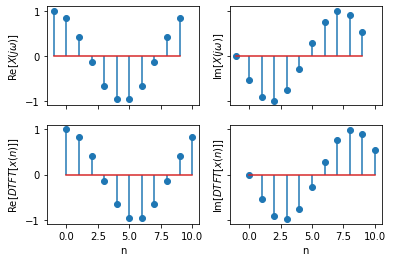

In [59]:
def seq_x(n_min, n_max, n_0):
    """
    Generate sequence by $ \delta(n-n_{0}) $
    """
    seq, noff = seq_delta(n_min, n_max)
    return seq_shift(seq, noff, n_0)


def seq_X(n_min, n_max, n_0):
    """
    Generate sequence by $ e^{-j{\omega}n_{0}} $
    """
    return np.array([np.exp(-1j*omega*n_0)
                     for omega in np.linspace(0, 2*np.pi, n_max-n_min+1, endpoint=False)]), 0-n_min


def test_seq_X():
    # Get sequence range
    n_min, n_max = -1, 9
    # Get n_0
    n_0 = 1
    # Get sequence x
    x, noff_x = seq_x(n_min, n_max, n_0)
    # Get DTFT[x(n)]
    dtft_x, noff_dtft_x = np.fft.fft(x), noff_x
    # Get $ X(j\omega) $
    X, noff_X = seq_X(n_min, n_max, n_0)
    # Check if DTFT[x(n)] == $ X(j\omega) $
    assert (abs(X - dtft_x) <
            0.0001).all(), f'\nExpect:\n{dtft_x}\nActual:\n{X}'
    print(f'X:{X}\nDTFT:{dtft_x}')
    print('DTFT[x(n)] equals X(jω)')
    plotVertical('',
                 [(X, noff_X, '$ X(j\omega) $'),
                 (dtft_x, noff_dtft_x, '$ DTFT[x(n)] $')])


test_seq_X()


2. $ e^{-an}u(n) $

## 理论计算

$$
a^{n}u(n),\quad|a|<1\Longleftrightarrow\frac{1}{1-ae^{-j\omega}}\\
X(e^{j\omega})=DTFT[x(n)]=\tilde{X}(e^{j\omega})=\frac{1}{1-e^{-a}e^{-j\omega}}
$$

## 编程验证


X:[1.58197671+0.j         1.33724409-0.38516667j 1.02107698-0.40332523j
 0.84864256-0.29364664j 0.76734134-0.17192214j 0.73479853-0.05628857j
 0.73479853+0.05628857j 0.76734134+0.17192214j 0.84864256+0.29364664j
 1.02107698+0.40332523j 1.33724409+0.38516667j]
DTFT:[1.58195029+0.j         1.33722176-0.38516024j 1.02105993-0.4033185j
 0.84862839-0.29364174j 0.76732853-0.17191927j 0.73478625-0.05628763j
 0.73478625+0.05628763j 0.76732853+0.17191927j 0.84862839+0.29364174j
 1.02105993+0.4033185j  1.33722176+0.38516024j]
DTFT[x(n)] equals X(jω)


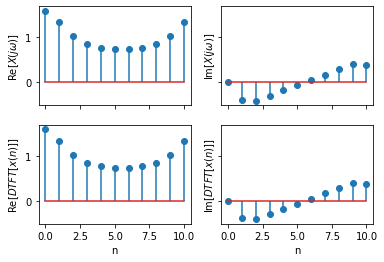

In [60]:
def seq_x(n_min, n_max, a):
    """
    Generate sequence by $ e^{-an}u(n) $
    """
    seq, noff = seq_u(n_min, n_max)
    return seq*np.array([np.exp(-a*n) for n in range(n_min, n_max+1)]), noff


def seq_X(n_min, n_max, a):
    """
    Generate sequence by $ \frac{1}{1-e^{-a}e^{-j\omega}} $
    """
    return np.array([1/(1-np.exp(-1j*omega-a))
                     for omega in np.linspace(0, 2*np.pi, n_max-n_min+1, endpoint=False)]), 0-n_min


def test_seq_X():
    # Get sequence range
    n_min, n_max = 0, 10
    # Get a
    a = 1
    # Get sequence x
    x, noff_x = seq_x(n_min, n_max, a)
    # Get DTFT[x(n)]
    dtft_x, noff_dtft_x = np.fft.fft(x), noff_x
    # Get $ X(j\omega) $
    X, noff_X = seq_X(n_min, n_max, a)
    # Check if DTFT[x(n)] == $ X(j\omega) $
    assert (abs(X - dtft_x) <
            0.0001).all(), f'\nExpect:\n{dtft_x}\nActual:\n{X}'
    print(f'X:{X}\nDTFT:{dtft_x}')
    print('DTFT[x(n)] equals X(jω)')
    plotVertical('',
                 [(X, noff_X, '$ X(j\omega) $'),
                  (dtft_x, noff_dtft_x, '$ DTFT[x(n)] $')])


test_seq_X()


3. $ e^{-(a+j\omega_{0})n}u(n) $

## 理论计算

$$
a^{n}u(n),\quad|a|<1\Longleftrightarrow\frac{1}{1-ae^{-j\omega}}\\
X(e^{j\omega})=DTFT[x(n)]=\tilde{X}(e^{j\omega})=\frac{1}{1-e^{-a}e^{-j(\omega+\omega_{0})}}
$$

## 编程验证


X:[0.96656502+0.38070122j 1.24756899+0.41560206j 1.56261712+0.12688039j
 1.42639668-0.32890838j 1.08518189-0.41943608j 0.88030129-0.3236046j
 0.78176706-0.20143836j 0.73949031-0.08428295j 0.7320135 +0.02848949j
 0.75575526+0.14284581j 0.82234695+0.26333508j]
DTFT:[0.96657102+0.38068494j 1.24757546+0.41558107j 1.56261866+0.12685425j
 1.42639066-0.32893207j 1.08517449-0.41945405j 0.88029556-0.32361918j
 0.7817634 -0.20145134j 0.73948863-0.08429527j 0.73201371+0.02847726j
 0.75575736+0.14283314j 0.82235105+0.26332125j]
DTFT[x(n)] equals X(jω)


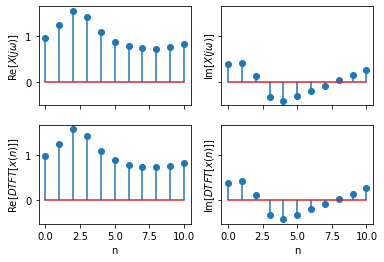

In [61]:
def seq_x(n_min, n_max, a, omega_0):
    """
    Generate sequence by $ e^{-(a+j\omega_{0})n}u(n) $
    """
    seq, noff = seq_u(n_min, n_max)
    return seq*np.array([np.exp(-(a+1j*omega_0)*n) for n in range(n_min, n_max+1)]), noff


def seq_X(n_min, n_max, a, omega_0):
    """
    Generate sequence by $ \frac{1}{1-e^{-a}e^{-j(\omega+\omega_{0})}} $
    """
    return np.array([1/(1-np.exp(-1j*(omega+omega_0)-a))
                     for omega in np.linspace(0, 2*np.pi, n_max-n_min+1, endpoint=False)]), 0-n_min


def test_seq_X():
    # Get sequence range
    n_min, n_max = 0, 10
    # Get a, omega_0
    a = 1
    omega_0 = 5
    # Get sequence x
    x, noff_x = seq_x(n_min, n_max, a, omega_0)
    # Get DTFT[x(n)]
    dtft_x, noff_dtft_x = np.fft.fft(x), noff_x
    # Get $ X(j\omega) $
    X, noff_X = seq_X(n_min, n_max, a, omega_0)
    # Check if DTFT[x(n)] == $ X(j\omega) $
    assert (abs(X - dtft_x) <
            0.0001).all(), f'\nExpect:\n{dtft_x}\nActual:\n{X}'
    print(f'X:{X}\nDTFT:{dtft_x}')
    print('DTFT[x(n)] equals X(jω)')
    plotVertical('',
                 [(X, noff_X, '$ X(j\omega) $'),
                  (dtft_x, noff_dtft_x, '$ DTFT[x(n)] $')])


test_seq_X()
